In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/bbb_molecules&PaDEL.csv', index_col=0)
df

,Original_Name,smiles,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,BBB
0,sulphasalazine,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,1,-1.6366,2.678460,20.9255,52.325102,18,18,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,moxalactam,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,4,-1.8532,3.434350,84.1596,65.253860,11,11,56,...,0.202821,0.515082,0.311531,0.404004,22.493883,107.951242,249.714723,0.589017,1.230617,0
2,clioquinol,Oc1c(I)cc(Cl)c2cccnc12,0,1.7041,2.903957,22.1264,28.605965,10,11,18,...,0.348308,0.488440,0.490672,0.207540,7.749546,14.229627,23.592414,0.476530,1.186652,0
3,bbcpd11 (cimetidine analog) (y-g13),CCNC(=NCCSCc1ncccc1Br)NC#N,0,1.3081,1.711126,58.1882,43.238688,6,6,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,schembl614298,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,1,-2.3618,5.578099,88.3588,66.801411,6,6,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9579,licostinel,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,0,0.1909,0.036443,57.1443,26.948379,6,6,20,...,0.350759,0.566435,0.535897,0.365741,8.796186,19.954489,35.953677,0.424423,1.468073,1
9580,ademetionine(adenosyl-methionine),[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,0,-4.7530,22.591009,84.4263,54.579446,0,0,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9581,mesocarb,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,0,1.4656,2.147983,98.9391,49.686274,0,0,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9582,tofisoline,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,0,-0.8870,0.786769,113.2376,61.464618,0,0,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


C:\Users\Mr_Nnobody\AppData\Local\Temp\ipykernel_31520\4156258762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BBB', data=df, palette='Set1')


_Feature((3, 7, 0, 'beta', 1), None, 16777216)

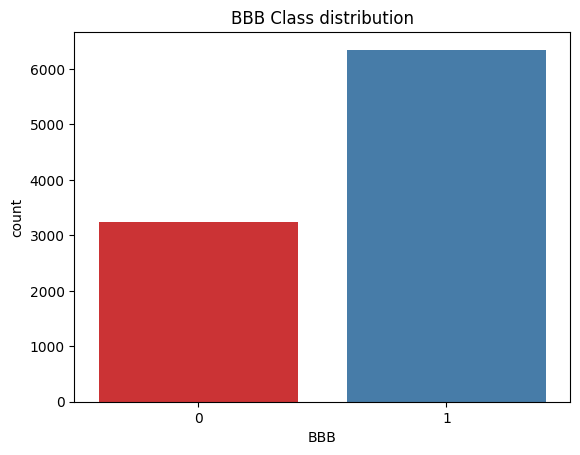

In [3]:
# check BBB class Distribution
sns.countplot(x='BBB', data=df, palette='Set1')
plt.title('BBB Class distribution')
plt.annotations

### Model Building

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['smiles', 'BBB', 'Original_Name'], axis=1)
y = df['BBB']

In [5]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Ensure numeric dtype
X = X.astype(float)

# Replace +-inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Clip extreme outliers per column (0.1% - 99.9% quantiles)
def clip_series(s, low_q=0.001, high_q=0.999):
    if s.dropna().empty:
        return s.fillna(0.0)
    low = s.quantile(low_q)
    high = s.quantile(high_q)
    return s.clip(lower=low, upper=high)

X = X.apply(clip_series, axis=0)

# Impute remaining NaNs with column median (more robust than 0)
X.fillna(X.median(), inplace=True)

# Optional check
import numpy as _np
assert _np.isfinite(X.to_numpy()).all(), "X still contains non-finite values"

selector = VarianceThreshold(threshold=0.1)
X_reduced = selector.fit_transform(X)

c:\Users\Mr_Nnobody\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [6]:
X.shape, X_reduced.shape

((9584, 1875), (9584, 1141))

In [7]:
X_reduced

array([[  1.        ,  -1.6366    ,   2.67845956, ...,  15.30219157,
         50.79838764, 106.73894294],
       [  4.        ,  -1.8532    ,   3.43435024, ...,  22.49388318,
        107.95124176, 249.71472316],
       [  0.        ,   1.7041    ,   2.90395681, ...,   7.7495461 ,
         14.22962691,  23.59241391],
       ...,
       [  0.        ,   1.4656    ,   2.14798336, ...,  15.30219157,
         50.79838764, 106.73894294],
       [  0.        ,  -0.887     ,   0.786769  , ...,  15.30219157,
         50.79838764, 106.73894294],
       [  0.        ,  -2.8918    ,   8.36250724, ...,  15.30219157,
         50.79838764, 106.73894294]])

In [8]:
X_reduced = pd.DataFrame(X_reduced, columns=X.columns[selector.get_support()])
X_reduced

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,L3i,Ti,Ai,Vi,L1s,L2s,L3s,Ts,As,Vs
0,1.0,-1.6366,2.678460,20.9255,52.325102,18.0,18.0,42.0,28.0,14.0,...,1.186209,15.498854,52.332389,110.514120,10.711296,2.985889,1.144041,15.302192,50.798388,106.738943
1,4.0,-1.8532,3.434350,84.1596,65.253860,11.0,11.0,56.0,36.0,20.0,...,1.600223,22.669173,109.671846,253.888895,16.330818,4.562241,1.600824,22.493883,107.951242,249.714723
2,0.0,1.7041,2.903957,22.1264,28.605965,10.0,11.0,18.0,13.0,5.0,...,0.133582,8.034627,15.443448,25.400052,4.929065,2.699228,0.121254,7.749546,14.229627,23.592414
3,0.0,1.3081,1.711126,58.1882,43.238688,6.0,6.0,35.0,19.0,16.0,...,1.186209,15.498854,52.332389,110.514120,10.711296,2.985889,1.144041,15.302192,50.798388,106.738943
4,1.0,-2.3618,5.578099,88.3588,66.801411,6.0,6.0,60.0,33.0,27.0,...,1.186209,15.498854,52.332389,110.514120,10.711296,2.985889,1.144041,15.302192,50.798388,106.738943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9579,0.0,0.1909,0.036443,57.1443,26.948379,6.0,6.0,20.0,17.0,3.0,...,0.430483,8.542821,18.981484,34.192171,5.267655,3.085338,0.443194,8.796186,19.954489,35.953677
9580,0.0,-4.7530,22.591009,84.4263,54.579446,0.0,0.0,49.0,27.0,22.0,...,1.186209,15.498854,52.332389,110.514120,10.711296,2.985889,1.144041,15.302192,50.798388,106.738943
9581,0.0,1.4656,2.147983,98.9391,49.686274,0.0,0.0,42.0,24.0,18.0,...,1.186209,15.498854,52.332389,110.514120,10.711296,2.985889,1.144041,15.302192,50.798388,106.738943
9582,0.0,-0.8870,0.786769,113.2376,61.464618,0.0,0.0,54.0,28.0,26.0,...,1.186209,15.498854,52.332389,110.514120,10.711296,2.985889,1.144041,15.302192,50.798388,106.738943


In [9]:
from sklearn.preprocessing import StandardScaler



# Standardizing training data
scaler = StandardScaler()
train_features = scaler.fit_transform(X_reduced)
X_reduced = pd.DataFrame(train_features, columns=X_reduced.columns)  # Exclude the target column 'BBB'

c:\Users\Mr_Nnobody\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Mr_Nnobody\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


In [11]:
# using Lazy predictor to compare models
from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, stratify=y, random_state=123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)

models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4442, number of negative: 2266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250532
[LightGBM] [Info] Number of data points in the train set: 6708, number of used features: 1138
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.662194 -> initscore=0.673089
[LightGBM] [Info] Start training from score 0.673089


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.90,0.88,0.88,0.90,24.53
ExtraTreesClassifier,0.90,0.87,0.87,0.90,15.56
RandomForestClassifier,0.90,0.87,0.87,0.89,72.90
LGBMClassifier,0.89,0.87,0.87,0.89,21.62
BaggingClassifier,0.88,0.86,0.86,0.88,306.90
DecisionTreeClassifier,0.87,0.86,0.86,0.87,55.79
LinearSVC,0.87,0.85,0.85,0.87,244.37
ExtraTreeClassifier,0.87,0.85,0.85,0.87,1.63
LinearDiscriminantAnalysis,0.87,0.85,0.85,0.87,7.08


In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, matthews_corrcoef, 
    average_precision_score, f1_score, accuracy_score, 
    precision_score, recall_score
)
import joblib
import pandas as pd

results = []
conf_matrices = []
saved_models = {}

# Using stratified kfold
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def calculate_metrics(y_true, y_pred, y_proba=None, model_name="Model"):
    """
    Calculate all evaluation metrics for binary classification.
    
    Parameters:
    -----------
    y_true : array-like
        True binary labels
    y_pred : array-like
        Predicted binary labels
    y_proba : array-like, optional
        Predicted probabilities for positive class (for ROC-AUC and PR-AUC)
    model_name : str
        Name of the model (for reporting)
    
    Returns:
    --------
    dict : Dictionary containing all calculated metrics
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    f1 = f1_score(y_true, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    # Calculate probability-based metrics if probabilities provided
    roc_auc = None
    pr_auc = None
    
    if y_proba is not None and len(y_proba.shape) > 1:
        try:
            roc_auc = roc_auc_score(y_true, y_proba[:, 1])
            pr_auc = average_precision_score(y_true, y_proba[:, 1])
        except Exception as e:
            print(f"Warning: Could not calculate probability metrics for {model_name}: {e}")
    
    # Return results as dictionary
    metrics = {
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'Specificity': round(specificity, 4),
        'F1 Score': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc is not None else None,
        'PR-AUC': round(pr_auc, 4) if pr_auc is not None else None,
        'MCC': round(mcc, 4),
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN
    }
    
    return metrics, cm


# Perform cross-validation on each model
for name, model in model_dictionary.items():
    print(f'Performing cross validation on {name}...')
    
    # Get cross-validated predictions
    y_pred = cross_val_predict(model, X_reduced, y, cv=fold)
    
    # Get probability predictions
    y_proba = cross_val_predict(model, X_reduced, y, cv=fold, method='predict_proba')
    
    # Calculate metrics using the function
    metrics, cm = calculate_metrics(y, y_pred, y_proba, model_name=name)
    
    # Store results
    results.append(metrics)
    conf_matrices.append({'model': name, 'cm': cm})
    
    # Fit model on full data for saving
    print(f'Fitting {name}...')
    model.fit(X_reduced, y)
    
    # Save model
    saved_models[name] = model
    print(f'✓ Successfully saved {name} model.\n')


# Display results as DataFrame
results_df = pd.DataFrame(results).sort_values('F1 Score', ascending=False)

print("="*100)
print("MODEL EVALUATION RESULTS (Sorted by F1 Score)")
print("="*100)
print(results_df.to_string(index=False))
print("="*100)

# Display top model
print(f"\n✓ Best Model: {results_df.iloc[0]['Model']} with F1 Score: {results_df.iloc[0]['F1 Score']}")

Performing cross validation on  KNN
Fitting  KNN
... Successfully saved KNN model.
Performing cross validation on  SVM


ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to be preprocessed.